In [ ]:
#checking if i have all the installations i need for my project
import numpy
import matplotlib
import scipy

print("NumPy version:", numpy.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("SciPy version:", scipy.__version__)

# if i have all of them i should see the versions printed

NumPy version: 2.2.6
Matplotlib version: 3.10.3
SciPy version: 1.15.3


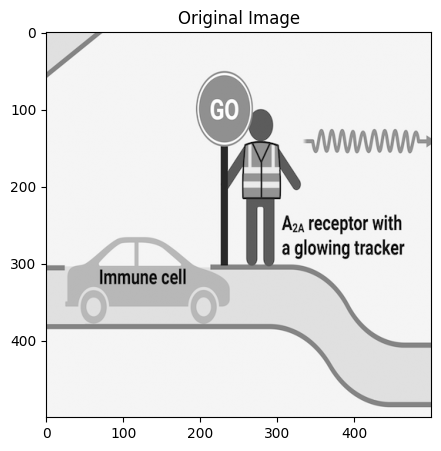

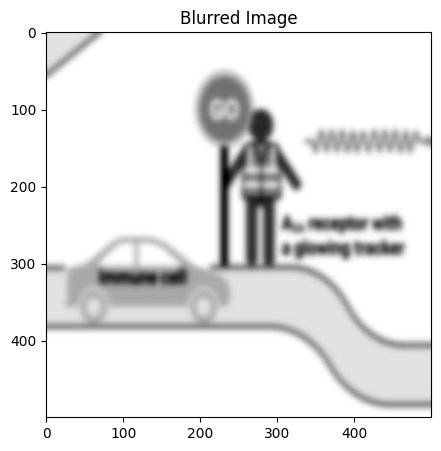

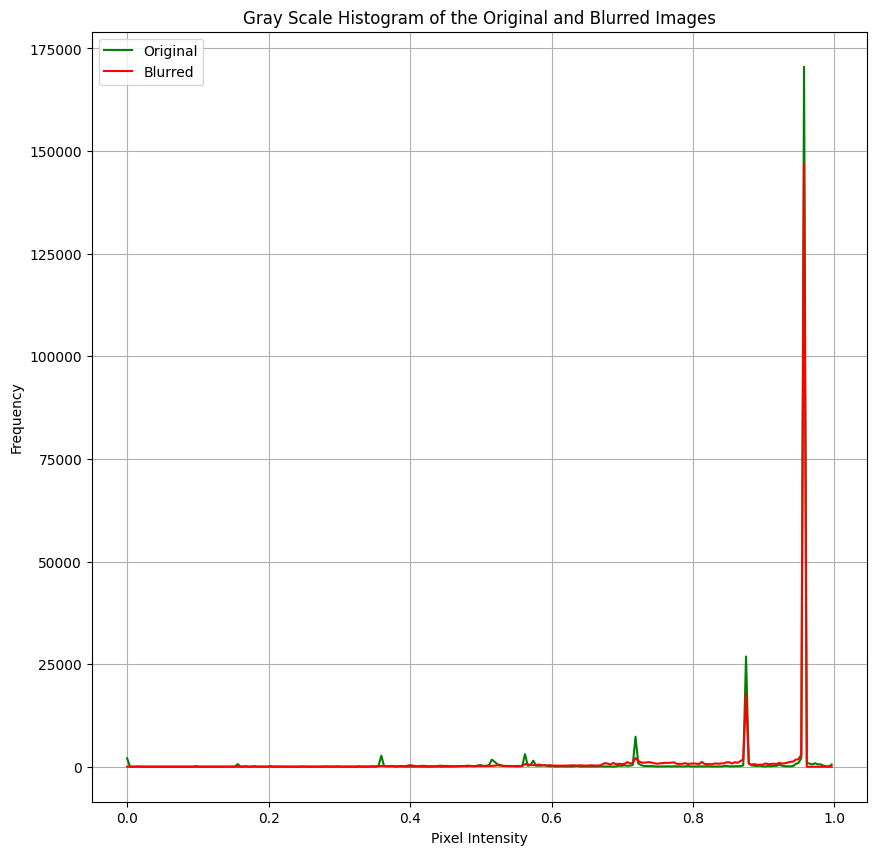

Kolmogorov-Smirnov test statistic: 0.3203125
P-value: 5.1755082504440896e-12
p<0.05; statistically significant


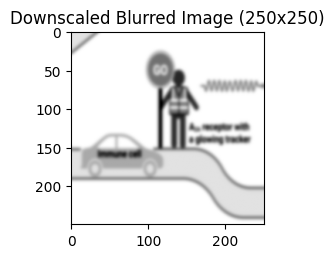

In [18]:
# importing the libraries and set the shortcuts/abbreviations for these libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, stats #modules used from scipy: ndimage for image processing so that it can produce a blurred version, stats for statistical tests
import matplotlib.image as mpimg # for matplotlib to read the image as numpy array

png = mpimg.imread('final_project_image.png') # to read the initial image as a numpy array and named it png
plt.figure(figsize=(5, 5), dpi=100) #convert the 500x500 pixel image to a inch unit that matplotlib can understand; assuming 100 pixel per inch as it is typical used
plt.imshow(png, cmap='gray') # without the colour map set to gray, th eimage shows in RGB
plt.title('Original Image') #title for readability of the results
plt.show() # to show the initial image i made which is in the same directory as this code

blurred = ndimage.gaussian_filter(png, sigma=4) # to apply a gaussian filter to the initial image stored as png; sigma is how blurred we want, i can change it to a hiher valye for a more blurred image
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.show() # pront the blurred image it just produced

# to create a histogram of the original image
hist_orig, bins_orig = np.histogram(png, bins=256, range=(0, 1)) 
# the initial image is 8 bit, so it has 2^8=256 possible pixel values; normalize these value into 0-1; 1 being vert intense/dark and 0 being no intensity/lightest
hist_blur, bins_blur = np.histogram(blurred, bins=256, range=(0, 1))  #same things applied for the blyrred image
plt.figure(figsize=(10, 10)) #set the plot size - this need to be before the plot command, otherwise it will not applied to whatever set before
# plot the two histograms on the same figure i just created
plt.plot(bins_orig[:-1], hist_orig, label='Original', color='green') # plot from the left edge of the first bin to the right edge of the last bin, original one in green
plt.plot(bins_blur[:-1], hist_blur, label='Blurred', color='red') #same for the blurred image, but in red
plt.title('Gray Scale Histogram of the Original and Blurred Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency') # have title and lavels for each axis
plt.legend() # to include the legand for the two histograms
plt.grid(True) # to add grid lines for better readability
plt.show() #this will show the histogram

# Use Scipy stats on the histograms to see if there is any statistically significant diﬀerence
statistic, p_value = stats.ks_2samp(hist_orig, hist_blur) # to run the two-sample Kolmogorov-Smirnov test on the two histograms, that compares whether the two histograms (orig and blur) are from the same distribution
print(f"Kolmogorov-Smirnov test statistic: {statistic}") #show how different the two histograms are
print(f"P-value: {p_value}") # show if the difference is statistically significant (p<0.05)
if p_value < 0.05:
    print("p<0.05; statistically significant")
else:
    print("not significant")

# To write out the blurred image as a PNG file
plt.imsave('blurred_bootcamp_project_image.png', blurred, cmap='gray')

#to write out a downscaled 250 x 250 pixel version
#first install the downscale function
from scipy.ndimage import zoom
def downscale(burred, target_size=(250, 250)): #define the downscale function, take the blrurred image and we want to downscale it to 250x250 pixels
    zoom_factors = (0.5,0.5) #target height/original height, target width/original width (250/500 = 0.5)
    return zoom(blurred, zoom_factors)
downscaled = downscale(blurred)
plt.imsave('blurred_bootcamp_project_image_250x250.png', downscaled, cmap='gray')

#this is to show the downscaled image we just saved
plt.figure(figsize=(2.5,2.5), dpi=100) #set the figure size for the downscaled image
plt.imshow(downscaled, cmap='gray')
plt.title('Downscaled Blurred Image (250x250)')
plt.show() # show the downscaled image
